## **CHAPTER 03. 컨테이너 서비스를 위한 도커 활용**

### **3.1. 컨테이너 서비스**
---

#### **3.1.1. 컨테이너 서비스란?**

컨테이너(container)에 우리가 서비스하고자 하는 애플리케이션 코드와 프로세스를 격리한다는 의미로 해석할 수 있다.
최근 들어 클라우드 기반의 컨테이너 서비스, 데브옵스, 마이크로서비스 아키텍처(MSA)라는 단어는 데이터 기반의 애플리케이션 프로젝트에서 빠지지 않는다.
컨테이너 기술은 최근 기술이 아니다.
1991 년에 처음 소개된 리눅스의 내장된 컨테이너(LXC) 기술을 이어받아 2013년 닷클라우드 엔지니어의 도커 발표로 시작되어 현재의 컨테이너 가상화 기술 표준이 되었다.

이렇듯 애플리케이션 개발 환경이 도커 기반의 컨테이너 서비스 환경으로 전환된 이유는 무엇일까?
대부분의 개발자가 개발, 테스트, 배포, 운영의 컴퓨팅 환경(스토리지, 네트워크, 보안, 패치 등) 차이로 인한 시행착오 및 다양한 오류 해결에 너무 많은 시간을 쏟는 공통적인 문제를 겪고 있다.
바로 가변적 인프라 환경으로 인한 일관성 없는 환경 제공 때문이다.

컨테이너 서비스는 기존 환경과 다르게 애플리케이션 실행에 필요한 바이너리, 라이브러리 및 구성 파일 등을 패키지로 묶어 배포하는 방식으로 논리적 패키징 메커니즘을 제공한다.
애플리케이션이 가지고 있는 운영체제, 하드웨어에 대한 의존성 문제를 해결한 것이다.
따라서 어떤 환경에서든 컨테이너 기반의 애플리케이션을 개발하고 배포할 수 있다.
이렇게 호스트 운영체제를 공유하고 애플리케이션에 필요한 환경을 패키징하는 것을 운영체제 레벨 가상화라고 한다.

일반적으로 가상화 방식을 크게 두 가지로 구분한다.

* 하드웨어 레벨 가상화: 하이퍼바이저 등을 이용한 가상머신의 방식을 말한다.
* 운영체제 레벨 가상화: 컨테이너 기반의 애플리케이션 서비스 방식을 말한다.

컨테이너화를 통해 개발자는 애플리케이션 개발에 집중하고, IT 부서는 소프트웨어의 버전과 패치 등 애플리케이션 운영에 필요한 세부적인 것을 관리하여 낭비되는 시간을 없애고 각자의 업무에 집중할 수 있다.
동시에 많은 사람들이 접속하는 포털 사이트 및 커뮤니티, 메일 서비스, 실시간 데이터 스트림 서비스 등 서비스 품질과 연관된 안정성과 확장성이 중요하다.
이러한 애플리케이션 서비스와 프라이빗/퍼블릭 클라우드 환경의 컨테이너화는 앞으로도 표준의 역할을 다할 것이다.

#### **3.1.2. 왜 도커 컨테이너 서비스일까?**

도커 도입이 갖는 의미를 알기 위해서는 먼저 도커를 이용한 컨테이너 애플리케이션 서비스 개발이 이루어지는 일반적인 과정을 이해할 필요가 있다.

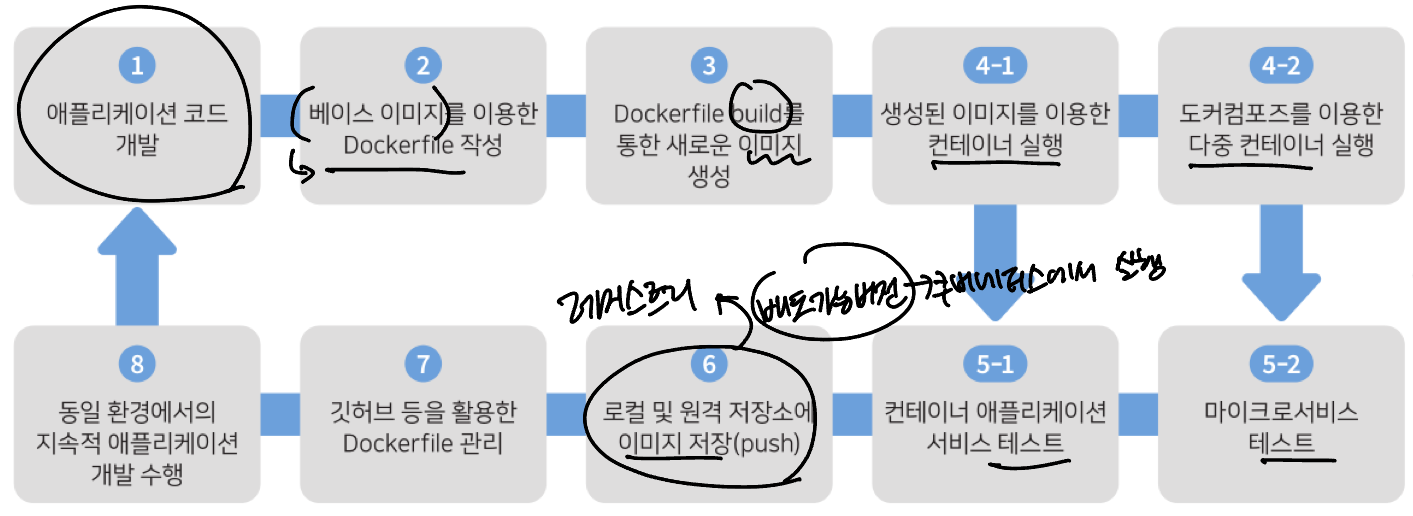

위는 도커 기반의 컨테이너 서비스가 배포되기까지 개발에서 운영에 이르는 과정을 보여준다.

1. 애플리케이션 코드 개발: 특정 서비스 구동을 위한 애플리케이션 코드 및 웹 화면 구성을 위한 코드를 개발한다.
2. 베이스 이미지를 이용한 Dockerfile 작성: 개발에 필요한 인프라 구성 요소를 Dockerfile에 작성한다. 즉, 도커 허브를 통해 베이스 이미지를 다운로드하고 다양한 구동 명령어(FROM, RUN, CMD, ENDPOINT, ENV, ADD 등)와 1에서 작성한 애플리케이션 코드, 라이브러리, 여러 도구를 Dockerfile에 포함시킨다.
3. Dockerfile build를 통해 새로운 이미지 생성: docker build 명령을 통해 Dockerfile을 실행한다. 각 단계별로 실행되는 로그를 화면에서 확인하며 이때 오류 발생 내용도 확인할 수 있다.

4-1. 생성된 이미지를 이용한 컨테이너 실행: 도커 명령어 docker images를 통해 생성된 이미지를 확인하고 이미지를 통한 컨테이너를 구동(docker run)한다.

4-2. 도커 컴포즈를 이용한 다중 컨테이너 실행: 도커 실행 옵션을 미리 작성한 docker-compose.yml을 통해 다중 컨테이너 간 실행 순서, 네트워크, 의존성 등을 통합 관리할 수 있고 마이크로서비스 개발에 활용한다. 예로, 하나의 docker-compose.yml 파일이 아닌 여러 개의 야믈 파일로 구성된 서비스 개발도 가능하다. 

5-1. 컨테이너 애플리케이션 서비스 테스트: 예컨대, Nginx를 이용한 웹 애플리케이션 컨테이너 서비스였다면 연결하는 IP와 포트 번호를 이용하여 웹 브라우저를 이용한 페이지 연결을 확인할 수 있다.

5-2. 마이크로서비스(MSA): 해당 서비스에 대한 테스트를 진행한다.

6. 로컬 및 원격 저장소에 이미지 저장: 로컬(도커 서버 또는 프라이빗 레지스트리) 및 원격(Docker Hub)에 있는 이미지 저장소에 생성한 이미지를 저장(push)하여 다른 팀 간의 공유 및 지속적인 이미지 관리를 수행한다.
7. 깃허브 등을 활용한 Dockerfile 관리: Dockerfile 코드를 깃허브에 저장 및 관리할 수 있고, 도커 허브 사이트와 연동하게 되면 자동화된 빌드(automated build) 기능을 이용한 이미지 생성도 가능하다.
8. 동일 환경에서의 지속적 애플리케이션 개발 수행: 1~7 과정을 통해 업무용 애플리케이션 이미지를 지속적으로 개발, 운영 및 관리할 수 있다.

도커 작동 과정에서 눈여겨볼 것은 컨테이너 동작에 필요한 모든 내용을 사전에 코드로 작성하여 앤서블, 셰프, 베이그런트, 퍼핏과 같은 이프라 프로비저닝 도구로 자동화하게 되면 기업이 필요할 때마다 애플리케이션 및 서버 환경을 적은 비용으로 빠르게 개발, 배포, 확장할 수 있다는 것이다.
이러한 개념을 IaC(Infrastructure as Code, 코드로서의 인프라스트럭쳐)라고 한다.

이 기능을 통해 개발자는 애플리케이션 개발, 테스트, 배포 시마다 모든 인프라 구성 요소를 하나하나 수동적으로 체크하거나 맞출 필요가 없고, 변경 불가능한 인프라(immutable infrastructure) 환경에서 언제든 동일한 상태에서의 개발이 가능해진다.
물론, 버전 업이나 패치 등의 작업이 필요하면 기존 이미지를 변경하지 않고 해당 작업을 수행한 새로운 이미지를 생성해 신규 인프라 서버로 사용 가능하다.

### **3.2. 도커 명령어 활용**
---